# Visualizing Earnings Based On College Majors

## Introduction

In this project, we will be eorking with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by __[American Community Survey](https://www.census.gov/programs-surveys/acs/)__, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their __[Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors)__.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more.

Using isualizations, we'll look to answer questions such as:
* Do students in more popular majors make more money?
* How many majors are predominantly male? Predominantly female?
* Which category of majors have the most students?


### Exploring the dataset

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')

In [30]:
first_row = recent_grads.iloc[0]
first_row

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [31]:
recent_grads.head(2)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50


In [32]:
recent_grads.tail(2)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [33]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [34]:
recent_grads.shape

(173, 21)

In [35]:
# Dropping missing values

recent_grads = recent_grads.dropna()
recent_grads.shape

(172, 21)

### Generating Scatterplots

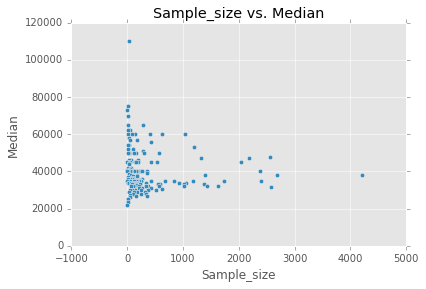

In [36]:
recent_grads.plot(x='Sample_size',y='Median',kind='scatter',title='Sample_size vs. Median')

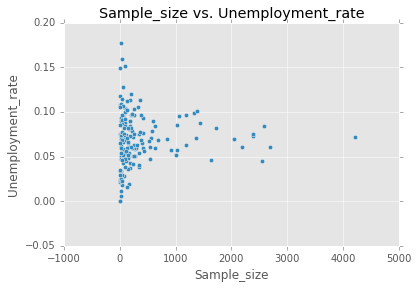

In [37]:
recent_grads.plot(x='Sample_size',y='Unemployment_rate',kind='scatter',title='Sample_size vs. Unemployment_rate')

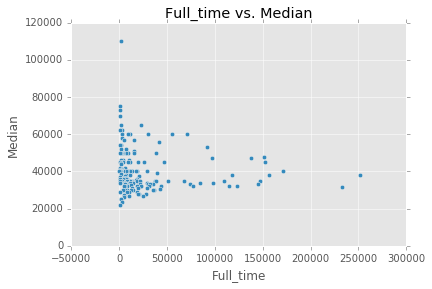

In [38]:
recent_grads.plot(x='Full_time',y='Median',kind='scatter',title='Full_time vs. Median')

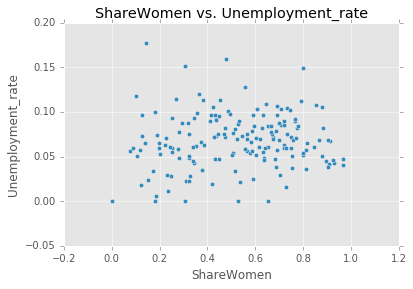

In [39]:
recent_grads.plot(x='ShareWomen',y='Unemployment_rate',kind='scatter',title='ShareWomen vs. Unemployment_rate')

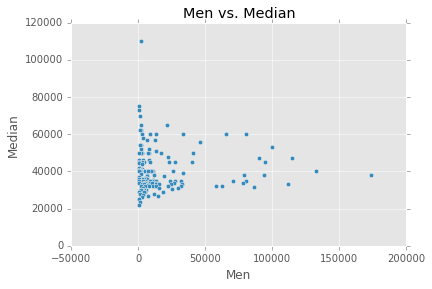

In [40]:
recent_grads.plot(x='Men',y='Median',kind='scatter',title='Men vs. Median')

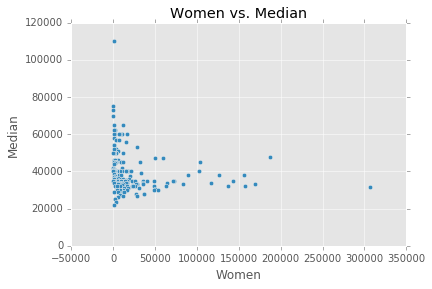

In [41]:
recent_grads.plot(x='Women',y='Median',kind='scatter',title='Women vs. Median')

None of these plots show relationships between their respective x-axis and y-axis

### Generating Histograms

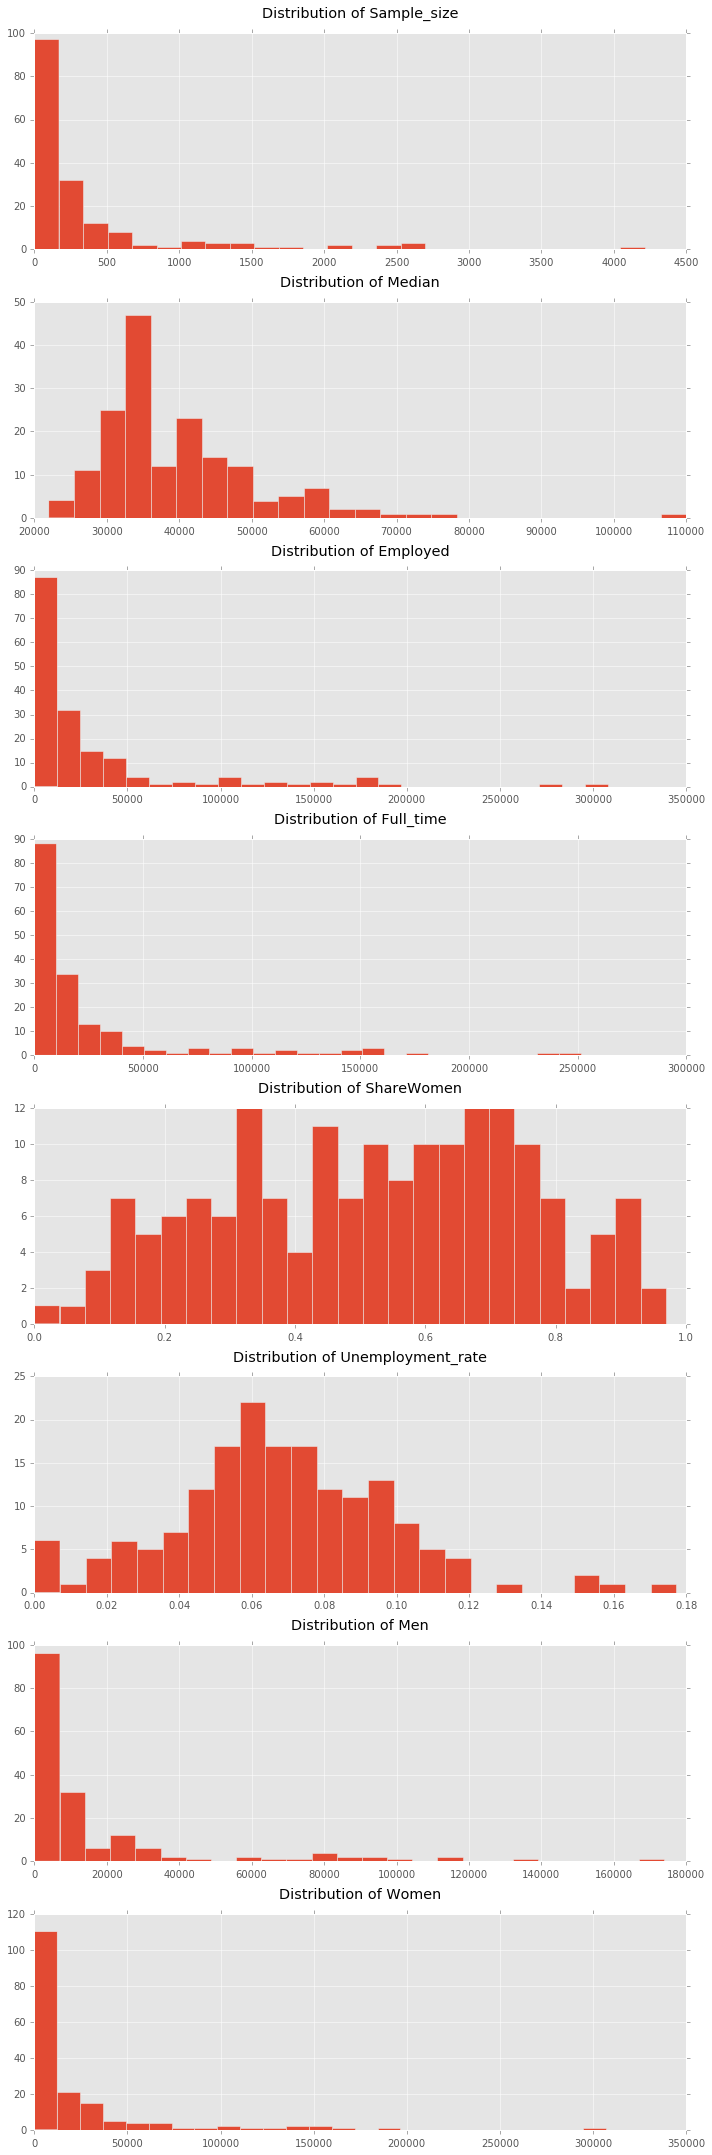

In [42]:
cols = ['Sample_size','Median','Employed','Full_time','ShareWomen','Unemployment_rate','Men','Women']
runs = [0,1,2,3,4,5,6,7]
fig = plt.figure(figsize = (10,30))
for i in runs:
    ax = fig.add_subplot(8,1, i+1)
    ax = recent_grads[cols[i]].hist(bins = 25)
    ax.set_title('Distribution of ' + cols[i], y = 1.05)
plt.tight_layout()
    


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0aecd32b38>,
      dtype=object)

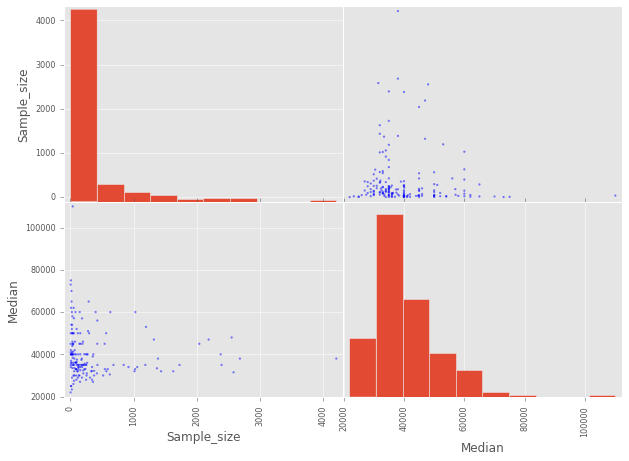

In [43]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize = (10,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0aea9dc710>,
      dtype=object)

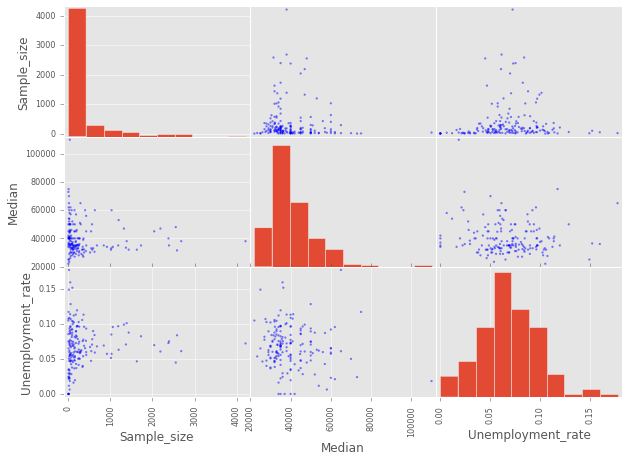

In [44]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize = (10,7))

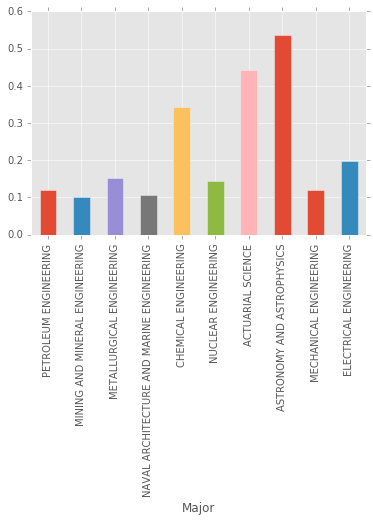

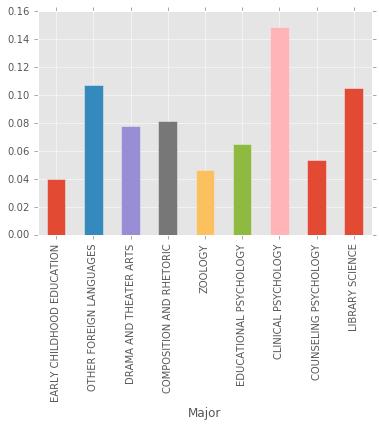

In [45]:
recent_grads[:10].plot.bar(x = 'Major', y = 'ShareWomen', legend = False)
recent_grads[163:].plot.bar(x = 'Major', y = 'Unemployment_rate', legend = False)